In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math

In [19]:
# load species name -> species id lookup dict
name_to_id_df = pd.read_csv('species codes.csv', encoding='unicode_escape')
name_to_id_dict = {}
for _, row in name_to_id_df.iterrows():
    name = "{}- {}".format(row['species_primary_common_name'], row['species_scientific_name']).lower().replace(' ', '')
    name_to_id_dict[name] = row['species_id']
    name_to_id_dict["{}-{}".format(row['species_primary_common_name'], row['species_scientific_name'])] = row['species_id']

In [44]:
ref_df = pd.read_csv('reference_data/pvt_kerala.csv')
cit_df = pd.read_csv('citizenData/Kerala_citizenData.csv')

In [40]:
cit_df.head()

,Observation_ID,Date_of_observation,User_id,User_Tree_id,Species_name,Lat,Long,State_name,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Flowers_male,Flowers_Female,Fruits_unripe,Fruits_ripe,Fruits_open,Year,Week
0,467438.0,2020-10-13,22219.0,94805.0,Aabehayat Mango- Mangifera indica,9.78619,76.44449,Kerala,2.0,2.0,1.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,2020,37
1,489809.0,2021-03-02,22219.0,94803.0,Aabehayat Mango- Mangifera indica,9.78499,76.44959,Kerala,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2021,7
2,544927.0,2021-11-23,22219.0,94805.0,Aabehayat Mango- Mangifera indica,9.78619,76.44449,Kerala,1.0,2.0,1.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,2021,42
3,544928.0,2021-11-24,22219.0,94805.0,Aabehayat Mango- Mangifera indica,9.78619,76.44449,Kerala,1.0,2.0,1.0,1.0,1.0,-2.0,-2.0,0.0,0.0,-2.0,2021,42
4,489810.0,2021-03-09,22219.0,94803.0,Aabehayat Mango- Mangifera indica,9.78499,76.44959,Kerala,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2021,8


In [30]:
ref_df.head()

,Unnamed: 0,id,species_id,updated_at,week,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Flowers_male,Flowers_Female,Fruits_unripe,Fruits_ripe,Fruits_open
0,0,1,1000,2023-01-16 10:42:02,0,-2,-2,-2,1,1,-2,-2,1,1,-2
1,1,1,1000,2023-01-16 10:42:02,1,-2,-2,-2,1,1,-2,-2,1,1,-2
2,2,1,1000,2023-01-16 10:42:02,2,-2,-2,-2,1,1,-2,-2,1,1,-2
3,3,1,1000,2023-01-16 10:42:02,3,-2,-2,-2,1,1,-2,-2,1,1,-2
4,4,1,1000,2023-01-16 10:42:02,4,-2,-2,-2,1,1,-2,-2,1,1,-2


In [31]:
len(cit_df), len(ref_df)

(3270, 11472)

In [32]:
cit_df['Species_name'].value_counts()

Species_name
Neem- Azadirachta indica                                435
Pongam Tree- Pongamia pinnata                           312
Tamarind- Tamarindus indica                             283
Guava tree-Psidium guajava                              243
Jamun- Syzygium cumini                                  221
                                                       ... 
Mexican oleander- Yellow oleander-Cascabela thevetia      1
Devil's tree- Alstonia scholaris                          1
Elephant apple- Dillenia indica                           1
Jacaranda- Jacaranda mimosifolia                          1
Country Fig- Ficus racemosa                               1
Name: count, Length: 64, dtype: int64

In [45]:
# get id of Jackfruit- Artocarpus heterophyllus
species_name = 'Jackfruit- Artocarpus heterophyllus'
species_id = name_to_id_dict['Jackfruit- Artocarpus heterophyllus']
jack_df = cit_df[cit_df['Species_name'] == 'Jackfruit- Artocarpus heterophyllus']

KeyError: 'Jackfruit- Artocarpus heterophyllus'

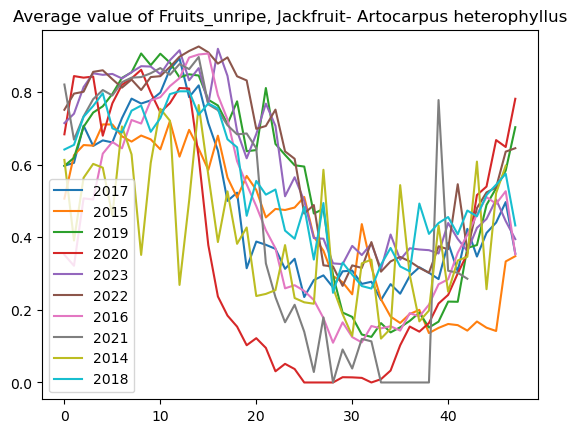

In [251]:
# plot percentage of observations with attr recorded
def condense_positives(val):
    if val > 1:
        return 1
    return val

attr = 'Fruits_unripe'
for year in jack_df['Year'].unique():
    jack_df_year = jack_df[jack_df['Year'] == year]
    attr_week_pairs = []
    for week in range(48):
        jack_df_year_week = jack_df_year[jack_df_year['Week'] == week]
        attr_arr = np.array(jack_df_year_week[attr])
        attr_arr = attr_arr[~np.isnan(attr_arr)]
        attr_arr = np.array(list(map(condense_positives, list(attr_arr))))
        attr_arr = list(filter(lambda x: x >= 0, list(attr_arr)))
        if len(attr_arr) > 0:
            mean = np.mean(attr_arr)
            std = math.sqrt(np.mean((attr_arr - mean)**2))
            attr_week_pairs.append((week, mean, std))
    weeks = list(map(lambda t: t[0], attr_week_pairs))
    means = list(map(lambda t: t[1], attr_week_pairs))
    plt.plot(weeks, means, label=year)

plt.title("Average value of {}, {}".format(attr, species_name))
plt.legend()
plt.show()

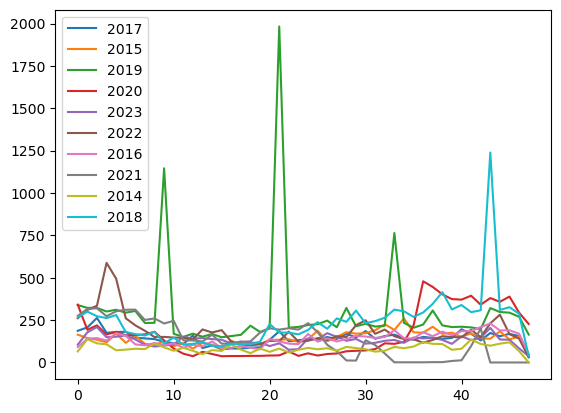

In [252]:
# plot total number of observations per week for jackfruit in Kerala
for year in jack_df['Year'].unique():
    weeks = list(range(48))
    nobs = list()
    for week in range(48):
        jack_df_year = jack_df[jack_df['Year'] == year]
        jack_df_year_week = jack_df_year[jack_df_year['Week'] == week]
        nobs.append(len(jack_df_year_week))
    plt.plot(weeks, nobs, label=year)
plt.legend()
plt.show()

## Questions
- which species in Kerala have reference data available?

In [46]:
top_10_species = cit_df['Species_name'].value_counts().index.tolist()[:10]

In [47]:
cat_attrs = ['Leaves_fresh', 'Leaves_mature','Leaves_old','Flowers_bud', 
             'Flowers_open', 'Flowers_male','Flowers_Female',
             'Fruits_unripe','Fruits_ripe','Fruits_open']
cols = ['species', 'citizen_obs_count'] + cat_attrs
ref_data_available_df = pd.DataFrame(columns=cols)
for species in cit_df['Species_name'].unique():
    ref_counts = {'species': species, 'citizen_obs_count': len(cit_df[cit_df['Species_name'] == species])}
    try:
        species_id = name_to_id_dict[species.lower().replace(' ', '')]
    except:
        print("no id for species {}".format(species))
        continue
    ref_species = ref_df[ref_df['species_id'] == species_id]
    for attr in cat_attrs:
        ref_species_attr = ref_species[ref_species[attr] >= 0]
        ref_counts[attr] = len(ref_species_attr)
    ref_data_available_df.loc[len(ref_data_available_df)] = ref_counts

ref_data_available_df[ref_data_available_df['Leaves_fresh'] > 0]
#ref_data_available_df.sort_values(by='citizen_obs_count', ascending=False)[:10]

no id for species Aabehayat Mango- Mangifera indica
no id for species Airi Mango- Mangifera indica
no id for species Albizia odoratissima-Black Siris
no id for species Alphonso Mango- Mangifera indica
no id for species Anogeissus pendula-Kardhai
no id for species Arjun tree- Terminalia arjuna
no id for species Axlewood tree- Anogeissus latifolia
no id for species Bedu- Punjab Fig-Ficus palmata
no id for species Broken Bones Tree-Oroxylum indicum
no id for species Chiku- Sapodilla-Manilkara zapota 
no id for species Chinar-Platanus orientalis
no id for species Crataeva religiosa-Garlic-pear tree
no id for species Dyer's oleander-Wrightia tinctoria
no id for species False white teak-Mallotus nudiflorus
no id for species Ficus mollis-Soft fig
no id for species Floss-silk tree- Ceiba speciosa
no id for species Frangipani- temple tree- Plumeria rubra
no id for species Garuga- Kharpat- Garuga pinnata
no id for species Ghost rree- Sterculia urens
no id for species Guh-de- Three-leaf caper tre

,species,citizen_obs_count,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Flowers_male,Flowers_Female,Fruits_unripe,Fruits_ripe,Fruits_open
33,Devil's tree- Alstonia scholaris,8061,48,48,48,48,48,0,0,0,0,0
125,White Babool-Acacia leucophloea,324,48,48,48,48,48,0,0,48,48,0


In [7]:
# get the week a tree transitions for a certain attribute
def get_transition_week(tree_df, attr, zero_to_one=True):
    transition_weeks = []
    for week in tree_df['Week'].unique():
        tree_df_week = tree_df[tree_df['Week'] == week]
        tree_df_next_week = tree_df[tree_df['Week'] == week + 1]
        if len(tree_df_week) > 0 and len(tree_df_next_week) > 0:
            tree_df_week_attr_zero = tree_df_week[tree_df_week[attr] == 0]
            tree_df_week_attr_one = tree_df_week[tree_df_week[attr] == 1]
            tree_df_next_week_attr_zero = tree_df_next_week[tree_df_next_week[attr] == 0]
            tree_df_next_week_attr_one = tree_df_next_week[tree_df_next_week[attr] == 1]
            if zero_to_one:
                if len(tree_df_week_attr_zero) > 0 and len(tree_df_week_attr_one) == 0 and len(tree_df_next_week_attr_one) > 0:
                    transition_weeks.append(week)
            else:
                if len(tree_df_week_attr_one) > 0 and len(tree_df_week_attr_zero) == 0 and len(tree_df_next_week_attr_zero) > 0:
                    transition_weeks.append(week)
    return transition_weeks

In [26]:
# get reference data transition weeks
def get_transition_week_ref(tree_df, attr, zero_to_one=True):
    transition_weeks = []
    print("ref for {}: {}".format(attr, tree_df[attr].tolist()))
    for week in tree_df['week'].unique():
        tree_df_week = tree_df[tree_df['week'] == week]
        tree_df_next_week = tree_df[tree_df['week'] == (week + 1) % 48]
        if len(tree_df_week) > 0 and len(tree_df_next_week) > 0:
            tree_df_week_attr_zero = tree_df_week[tree_df_week[attr] == 0]
            tree_df_week_attr_one = tree_df_week[tree_df_week[attr] == 1]
            tree_df_next_week_attr_zero = tree_df_next_week[tree_df_next_week[attr] == 0]
            tree_df_next_week_attr_one = tree_df_next_week[tree_df_next_week[attr] == 1]
            if zero_to_one:
                if len(tree_df_week_attr_zero) > 0 and len(tree_df_week_attr_one) == 0 and len(tree_df_next_week_attr_one) > 0:
                    transition_weeks.append(week)
            else:
                if len(tree_df_week_attr_one) > 0 and len(tree_df_week_attr_zero) == 0 and len(tree_df_next_week_attr_zero) > 0:
                    transition_weeks.append(week)
    return transition_weeks

finding transitions for species Mango (all varieties)- Mangifera indica, attr Flowers_bud
ref for Flowers_bud: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


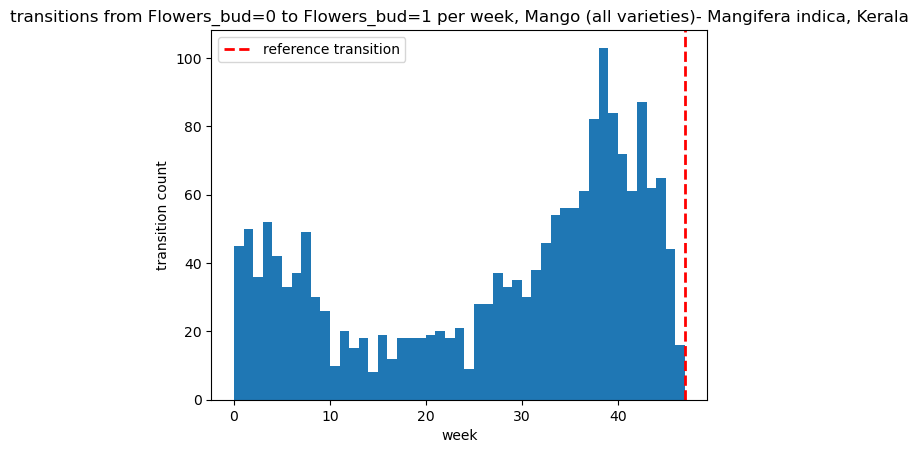

finding transitions for species Mango (all varieties)- Mangifera indica, attr Flowers_open
ref for Flowers_open: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


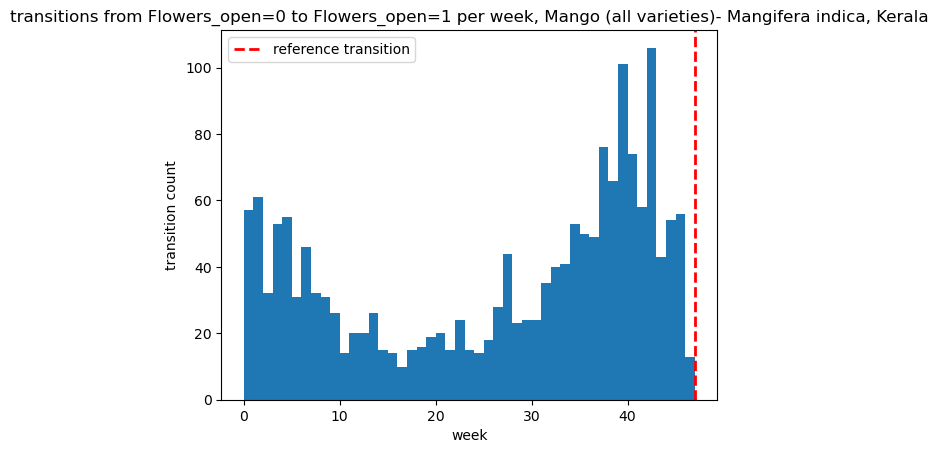

finding transitions for species Mango (all varieties)- Mangifera indica, attr Fruits_unripe
ref for Fruits_unripe: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


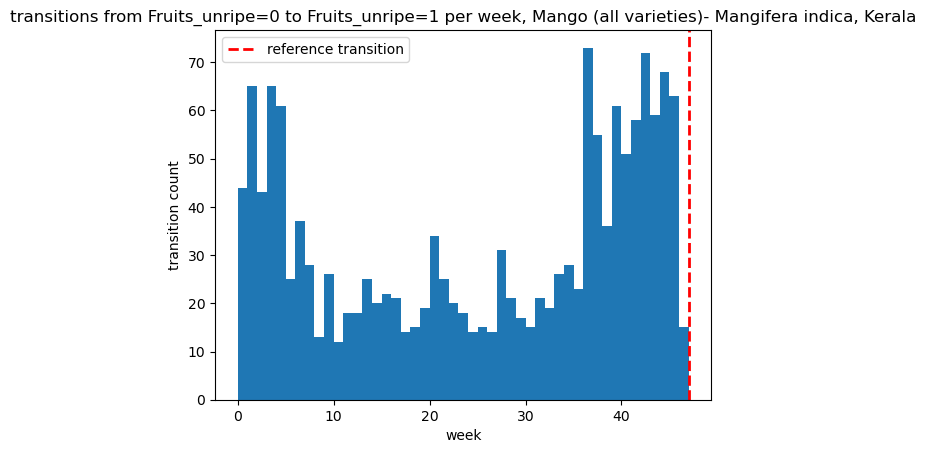

finding transitions for species Mango (all varieties)- Mangifera indica, attr Fruits_ripe
ref for Fruits_ripe: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


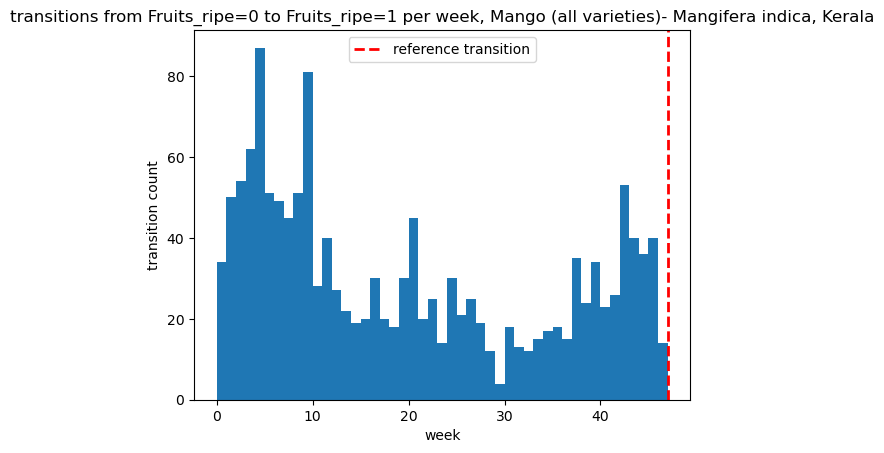

finding transitions for species Teak- Tectona grandis, attr Flowers_bud


In [ ]:
# for species, get average week where phenophase switches from attr=0 to attr=1
for species in ref_data_available_df.sort_values(by='citizen_obs_count', ascending=False)[:10]['species'].tolist():
    species_df = cit_df[cit_df['Species_name'] == species]
    species_id = name_to_id_dict[species.lower().replace(' ', '')]
    species_ref_df = ref_df[ref_df['species_id'] == species_id]
    total = len(species_df['User_Tree_id'].unique())
    for transition_attr in cat_attrs:
        # find # of ref datapoints for attr
        num_ref_for_attr = ref_data_available_df.loc[ref_data_available_df['species'] == species].iloc[0][transition_attr]

        # if there is no reference data for this attribute, skip
        if num_ref_for_attr == 0:
            continue
        
        print("finding transitions for species {}, attr {}".format(species, transition_attr))
        
        # get transition weeks for tree id in cit data
        transition_weeks = []
        for user_tree_id in species_df['User_Tree_id'].unique():
            species_df_for_tree_id = species_df[species_df['User_Tree_id'] == user_tree_id].sort_values(by=['Year', 'Week'], ascending=[True, True])
            transition_weeks += get_transition_week(species_df_for_tree_id, transition_attr)

        # get transition week in ref data
        transition_weeks_ref = get_transition_week_ref(species_ref_df, transition_attr)
        
        # get counts for each transition week
        counts = pd.Series(transition_weeks).value_counts()
        count_idxs, counts = list(counts.index), list(counts)
        count_idxs, counts
        
        # plot the distribution of transitions
        plt.title("transitions from {}={} to {}={} per week, {}, Kerala".format(transition_attr, 0, transition_attr, 1, species))
        plt.xlabel("week")
        plt.ylabel("transition count")
        plt.bar(x=count_idxs, height=counts, width=1, align='edge')
        for transition_week in transition_weeks_ref:
            plt.axvline(x=transition_weeks_ref, color='red', linewidth=2, linestyle='--', label='reference transition')
        plt.legend()
        plt.show()

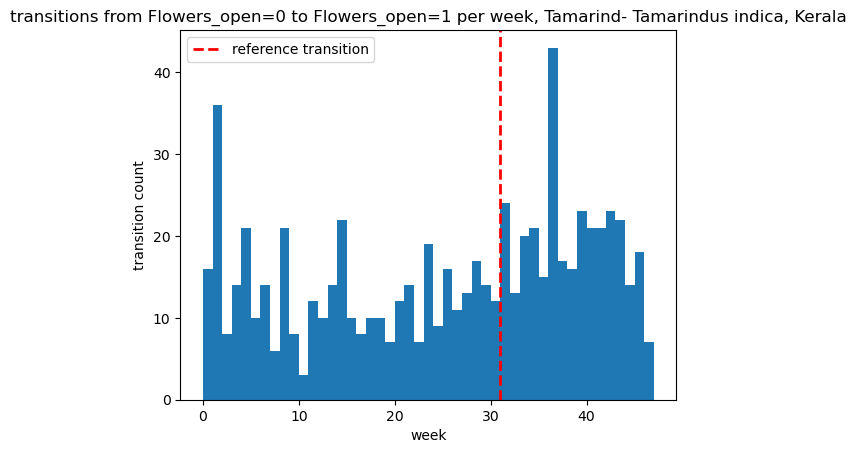

In [16]:
# get counts for each transition week
counts = pd.Series(transition_weeks).value_counts()
count_idxs, counts = list(counts.index), list(counts)
count_idxs, counts

# plot the distribution of transitions
plt.title("transitions from {}={} to {}={} per week, {}, Kerala".format(transition_attr, 0, transition_attr, 1, species))
plt.xlabel("week")
plt.ylabel("transition count")
plt.bar(x=count_idxs, height=counts, width=1, align='edge')
for transition_week in transition_weeks_ref:
    plt.axvline(x=transition_weeks_ref, color='red', linewidth=2, linestyle='--', label='reference transition')
plt.legend()
plt.show()

# Notes
- We plot the weeks where a phenophase is first observed, when it had not been observed the previous week

In [256]:
cit_df.columns

Index(['Observation_ID', 'Date_of_observation', 'User_id', 'User_Tree_id',
       'Species_name', 'Lat', 'Long', 'State_name', 'Leaves_fresh',
       'Leaves_mature', 'Leaves_old', 'Flowers_bud', 'Flowers_open',
       'Flowers_male', 'Flowers_Female', 'Fruits_unripe', 'Fruits_ripe',
       'Fruits_open', 'Year', 'Week'],
      dtype='object')